# Lab 5
## Objective 
To construct and study the transfer characteristic of the voltage-controlled amplifier (VCA) subsystem. 

## Capture Example
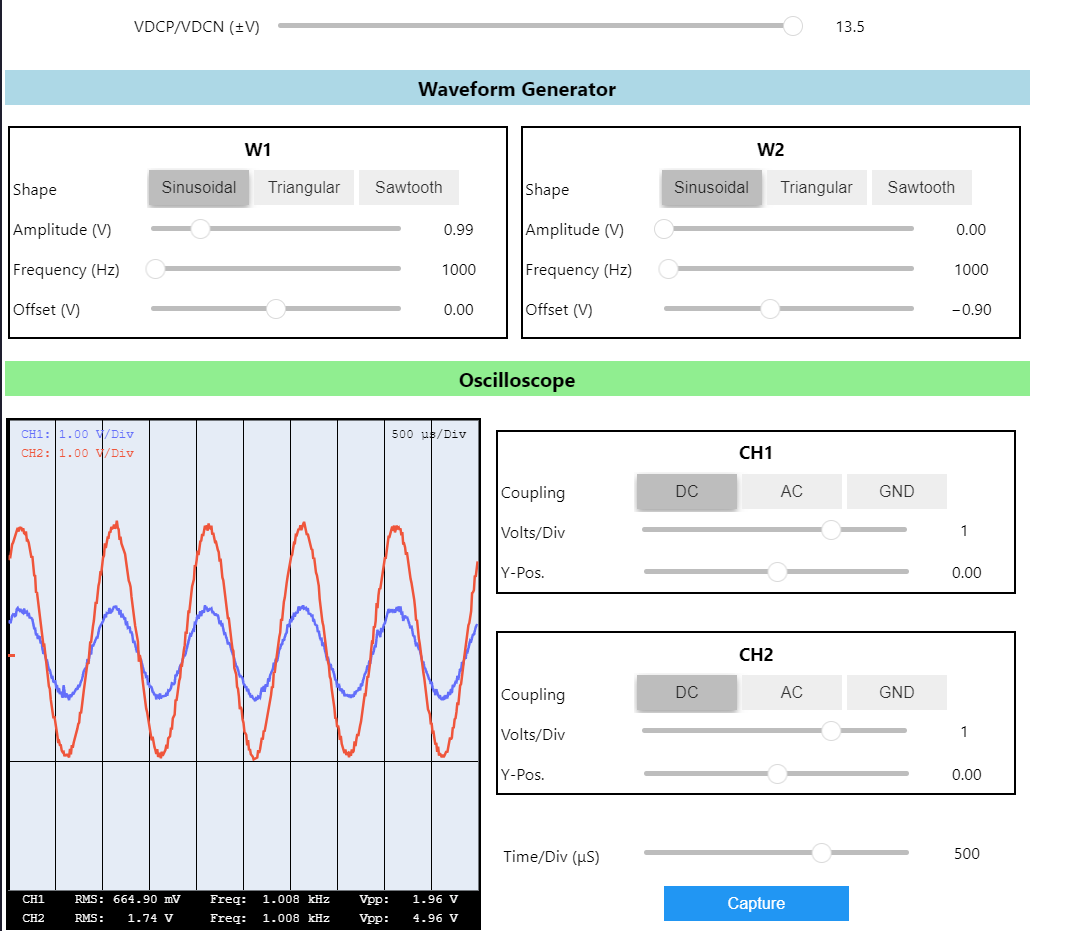

In [ ]:
#communication channel setup 
import serial 
import serial.tools.list_ports 
import numpy as np 
import plotly.graph_objs as go 
 
VID = 61525 
PID = 38912 
 
device = None 
 
ports = serial.tools.list_ports.comports() 
for p in ports: 
    if p.vid == VID and p.pid == PID: 
        try: 
            device = serial.Serial(p.device) 
        except serial.SerialException: 
            print('Reconnect the controller unit.') 
 
if device is None: 
    raise Exception('No suitable device detected.')

### VCA gain characterization

In [1]:
import numpy as np 
import plotly.graph_objs as go 
 
v_a = np.array([5.4, 4.5, 3.6, 2.7, 1.8, 0.9, 0, -0.9, -1.8, -2.7])  
v_IN = np.array([5.7,5.48,5.5,5.5,3.61,3.63,3.62,1.96,1.8,1.7]) 
v_OUT = np.array([0.51,0.55,0.46,0.66,0.8,1.8,3.63,4.91,10.81,24.18]) 
 
v_C = 3.3/(56 + 3.3)*v_a # Eq. (5.2) 
gain = 20*np.log10(v_OUT/v_IN) # Eq. (5.3) 
 
fig = go.Figure() 
fig.add_trace(go.Scatter(x=v_C, y=gain, mode='markers', name='Measured gain')) 
fig.update_layout(xaxis_title='V<sub>C</sub> (V)', yaxis_title='Gain (dB)') 

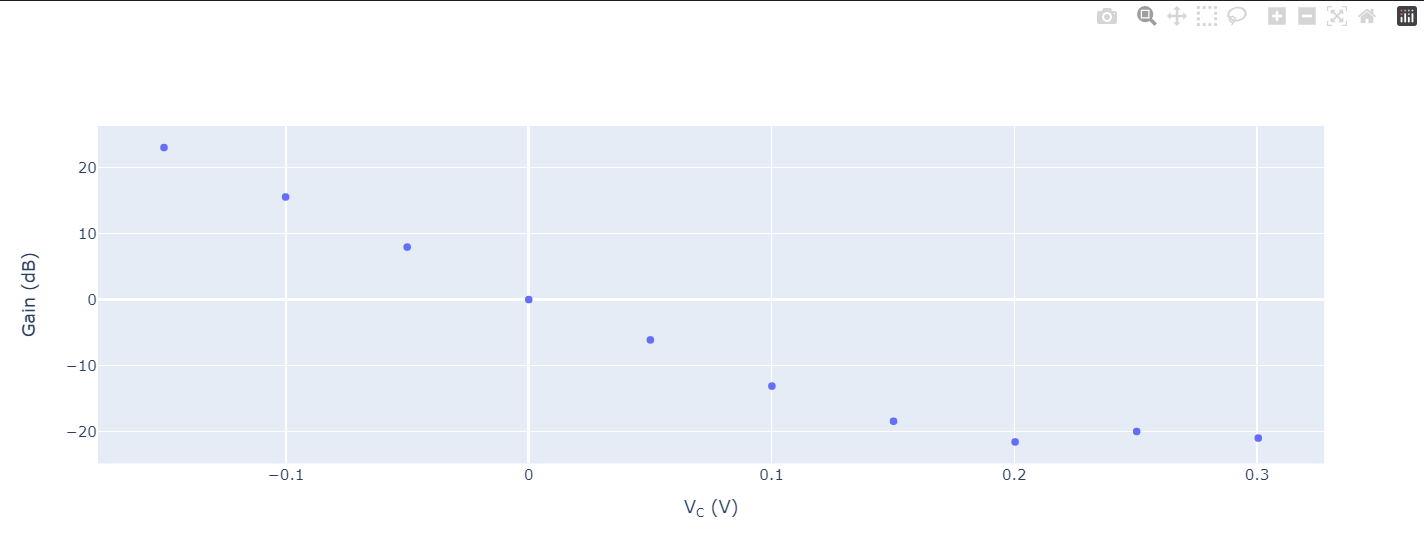

In [9]:
coef = np.polyfit(v_C, gain, deg=1) # deg=1 for order 1 polynomial (linear) 
fit = coef[0]*v_C + coef[1] 
 
lab_temp = 25 # laboratory temperature 
gain_spec = -v_C/(0.006*(1 + 0.0033*(lab_temp - 25))) # Eq. (5.1) 
 
fig.add_trace(go.Scatter(x=v_C, y=fit, mode='lines', line=dict(dash='dash'), 
  name='Best fit')) 
fig.add_trace(go.Scatter(x=v_C, y=gain_spec, mode='lines', line=dict(dash='dot'),  
  name='Specified gain')) 

print('m = ' + str(coef[0]))
print('measured gain sensitivity =' + str(1/coef[0]))

m = -103.4584811782203
measured gain sensitivity =-0.00966571313063618


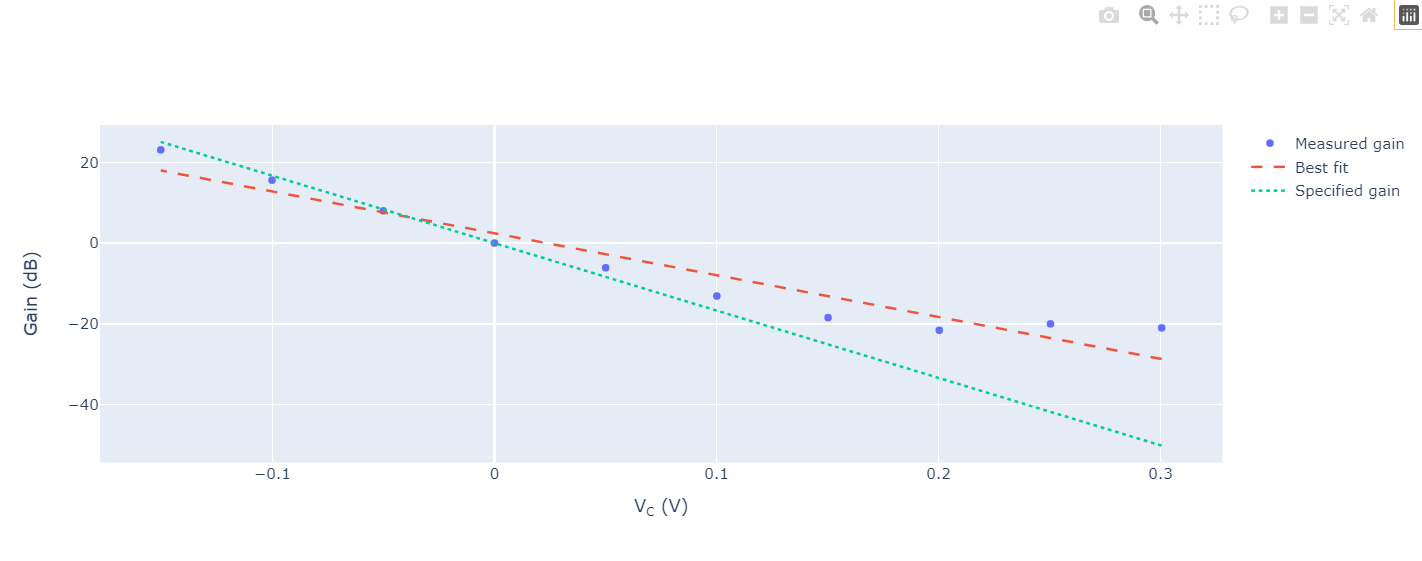

Measured gain sensitivity = ~ -9mV/dB, which is larger in magnitutde than the specified gain sensitivity


Applying small signal amplitude results in low Vin which also results in high Vout

High signal amplitude with high VCA gains will results saturation which in theory let Vout = +13.5V / -13.5V

## Open-Ended Questions

A VCA is a processor that can change the amplitude of a signal in response to a control voltage applied to its amplitude modulation control input. 